## Calculating ChatGPT next token probability

In [ ]:
!pip install --upgrade openai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 734.6/734.6 kB 10.6 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.86.0
    Uninstalling openai-1.86.0:
      Successfully uninstalled openai-1.86.0


Number of tokens received: 20

Top 10 tokens with their probabilities:
' to': 80.321%
' far': 3.912%
' places': 3.074%
' where': 2.102%
' higher': 1.239%
' a': 1.209%
' on': 0.845%
' into': 0.800%
' closer': 0.778%
' beyond': 0.679%


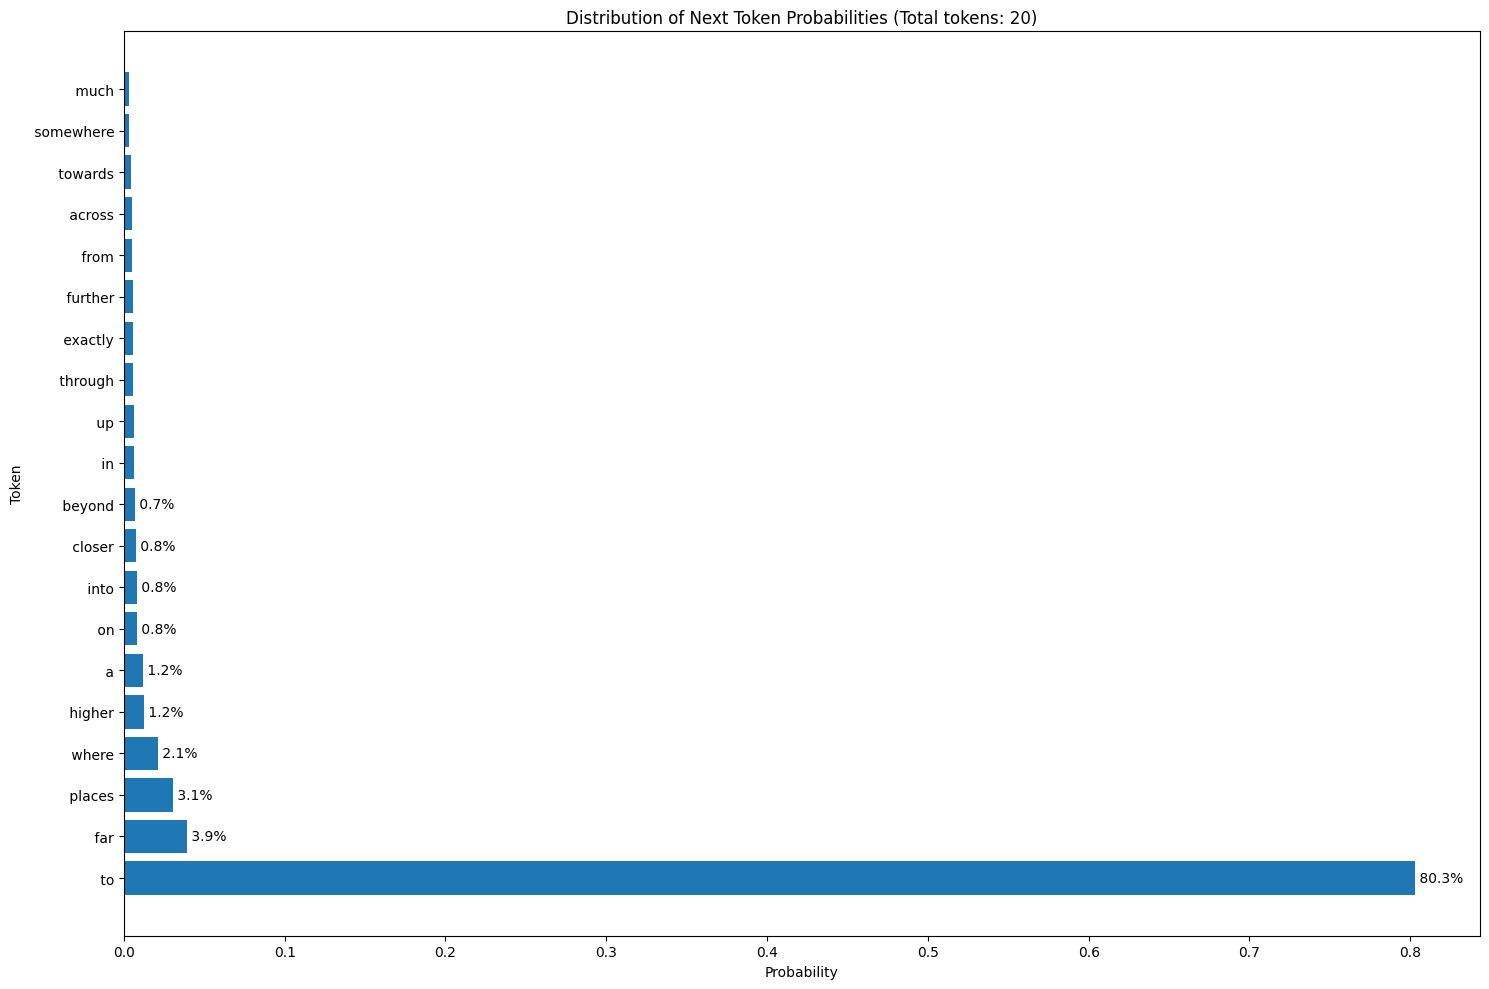

In [ ]:
import openai
import matplotlib.pyplot as plt
import numpy as np

# Initialize OpenAI client
client = openai.OpenAI(api_key="")

# The incomplete sentence
sentence = "After years of hard work, your effort will take you"

# Get completion with logprobs
response = client.completions.create(
    model="gpt-3.5-turbo-instruct",
    prompt=sentence,
    max_tokens=1,
    logprobs=50,  # Request top 50 logprobs
    temperature=0
)

# Extract and convert logprobs to probabilities
logprobs = response.choices[0].logprobs.top_logprobs[0]
print(f"Number of tokens received: {len(logprobs)}")

probs = {token: np.exp(logprob) for token, logprob in logprobs.items()}

# Normalize probabilities
total = sum(probs.values())
probs = {token: prob/total for token, prob in probs.items()}

# Sort probabilities
sorted_items = sorted(probs.items(), key=lambda x: x[1], reverse=True)
print("\nTop 10 tokens with their probabilities:")
for token, prob in sorted_items[:10]:
    print(f"'{token}': {prob:.3%}")

tokens, probabilities = zip(*sorted_items)

# Create visualization showing all available tokens
plt.figure(figsize=(15, 10))  # Made figure larger to accommodate more tokens
plt.barh(range(len(tokens)), probabilities)
plt.yticks(range(len(tokens)), tokens)
plt.title(f'Distribution of Next Token Probabilities (Total tokens: {len(tokens)})')
plt.xlabel('Probability')
plt.ylabel('Token')

# Add percentage labels for top probabilities only (to avoid cluttering)
for i, prob in enumerate(probabilities[:10]):  # Show labels for top 10
    plt.text(prob, i, f' {prob:.1%}', va='center')

plt.tight_layout()
plt.show()


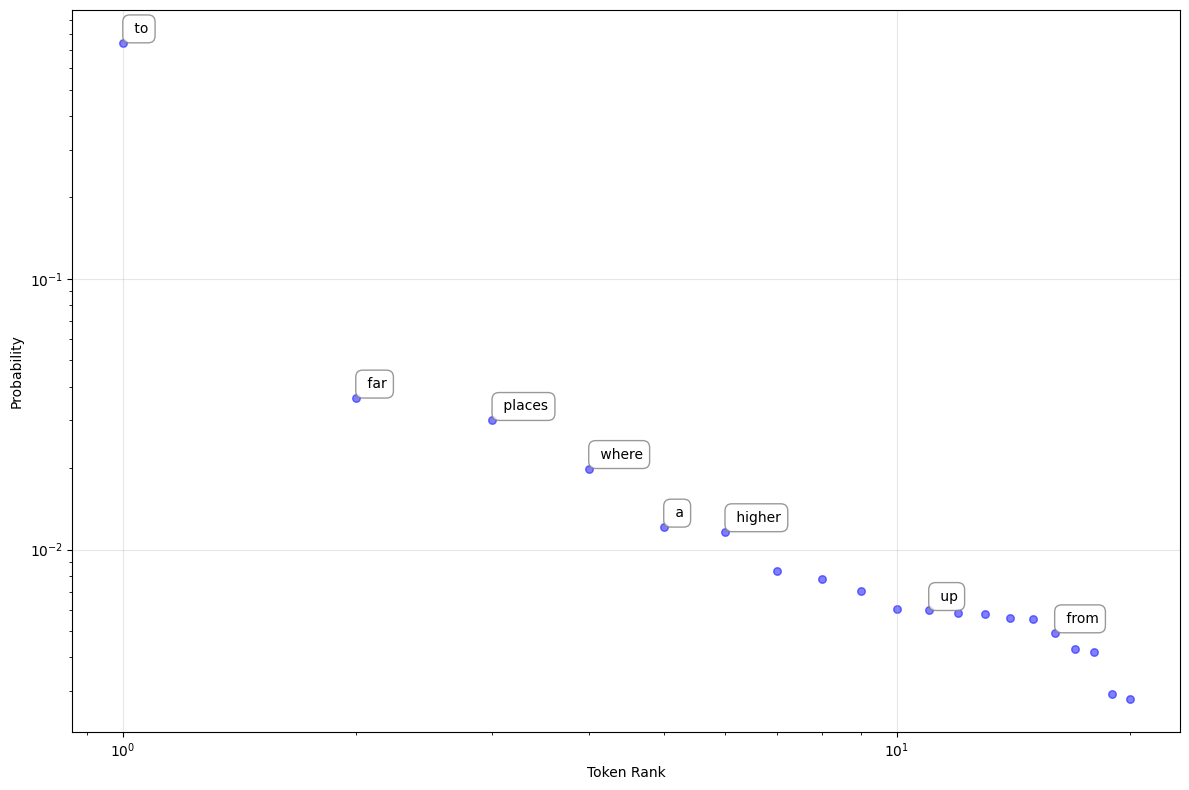


Top 10 tokens with their probabilities:
' to': 74.410%
' far': 3.630%
' places': 3.000%
' where': 1.994%
' a': 1.212%
' higher': 1.165%
' on': 0.832%
' into': 0.777%
' closer': 0.704%
' beyond': 0.606%


In [ ]:
import openai
import matplotlib.pyplot as plt
import numpy as np

# Initialize OpenAI client
client = openai.OpenAI(api_key="")


# The incomplete sentence
sentence = "After years of hard work, your effort will take you"

# Get completion with logprobs
response = client.completions.create(
    model="gpt-3.5-turbo-instruct",
    prompt=sentence,
    max_tokens=1,
    logprobs=50,
    temperature=0
)

# Extract and convert logprobs to probabilities
logprobs = response.choices[0].logprobs.top_logprobs[0]
probs = {token: np.exp(logprob) for token, logprob in logprobs.items()}

# Sort probabilities
sorted_items = sorted(probs.items(), key=lambda x: x[1], reverse=True)
tokens, probabilities = zip(*sorted_items)

# Create the plot
plt.figure(figsize=(12, 8))

# Create scatter plot with logarithmic axes
x_positions = np.arange(1, len(tokens) + 1)
plt.scatter(x_positions, probabilities, color='blue', alpha=0.5, s=30)

# Set logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

# Customize the plot
plt.grid(True, alpha=0.3)
plt.xlabel('Token Rank')
plt.ylabel('Probability')

# Add token labels with lines
for i, (token, prob) in enumerate(zip(tokens, probabilities)):
    # Add labels for selected tokens
    if prob > 0.01 or i % 5 == 0:
        plt.annotate(
            token,
            xy=(x_positions[i], prob),
            xytext=(5, 5),
            textcoords='offset points',
            ha='left',
            va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.8),
            arrowprops=dict(arrowstyle='-', color='gray', alpha=0.5)
        )

# Adjust layout
plt.tight_layout()
plt.show()

# Print top tokens and their probabilities
print("\nTop 10 tokens with their probabilities:")
for token, prob in list(zip(tokens, probabilities))[:10]:
    print(f"'{token}': {prob:.3%}")

## Zero shot vs Few shot learning: Example 1

In [ ]:
from openai import OpenAI

# Initialize the client
client = OpenAI(api_key='')  # Replace with your actual API key

def get_completion(prompt):
    """Simple function to get completion from OpenAI API"""
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": prompt}],
        temperature=0
    )
    return response.choices[0].message.content

# Text to classify
review = "The interface is complicated and the documentation is unclear."

# 1. Zero-shot learning example
zero_shot_prompt = """
Classify if positive or negative:

Review: The interface is complicated and the documentation is unclear.
"""

print("Zero-shot Learning Result:")
print(get_completion(zero_shot_prompt))
print()

# 2. Few-shot learning example
few_shot_prompt = """
Here are some examples of software review classifications:

Review: The app is fast and intuitive to use
Classification: Positive

Review: Keeps crashing on startup
Classification: Negative

Review: Good features but has a steep learning curve
Classification: Negative

Now classify this review:
Review: The interface is complicated and the documentation is unclear.
"""

print("Few-shot Learning Result:")
print(get_completion(few_shot_prompt))



Zero-shot Learning Result:
Negative

Few-shot Learning Result:
Classification: Negative


## Zero shot vs Few shot learning: Example 2

In [ ]:
from openai import OpenAI

# Initialize the client
client = OpenAI(api_key='')  # Replace with your actual API key

def get_completion(prompt):
    """Simple function to get completion from OpenAI API"""
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": prompt}],
        temperature=0
    )
    return response.choices[0].message.content

# Test cases - technical bug reports that need to be classified by severity
bug_reports = [
    "App crashes when uploading files larger than 2GB",
    "Font color is slightly different on the settings page",
    "Users can't log in during peak hours",
    "Tooltip shows wrong keyboard shortcut",
    "Rare data corruption occurs, leading to data loss in some edge cases",
    "Push notifications are delayed by up to 2 minutes",
    "Backend service occasionally times out during payment processing",
    "User profile pictures sometimes fail to load on the dashboard",
    "Server memory leak causes performance degradation over time",
    "Mobile app uses excessive battery when the GPS is on"
]

# Zero-shot learning attempt
zero_shot_prompt = """
Classify the following bug report into one of these severity levels:
P0 (Critical), P1 (High), P2 (Medium), P3 (Low)

Bug report: {bug}

Provide only the severity level as response (P0, P1, P2, or P3).
"""

# Few-shot learning with carefully chosen examples
few_shot_prompt = """
Here are examples of bug reports and their severity classifications:

Bug: "Service completely down for all users"
Severity: P0 (Critical - immediate fix needed, affects all users, core functionality broken)

Bug: "Payment processing fails intermittently"
Severity: P1 (High - urgent fix needed, affects revenue, has workaround)

Bug: "Search results are slow to load"
Severity: P2 (Medium - should be fixed soon, affects user experience but not blocking)

Bug: "Wrong icon color in dark mode"
Severity: P3 (Low - minor issue, can be fixed in future release)

Now classify this bug report with one of these severity levels (P0, P1, P2, or P3):
Bug: {bug}

Provide only the severity level as response (P0, P1, P2, or P3).
"""

print("Comparing Zero-shot vs Few-shot Learning for Bug Severity Classification:\n")

for bug in bug_reports:
    print(f"Bug Report: {bug}")

    # Get zero-shot prediction
    zero_result = get_completion(zero_shot_prompt.format(bug=bug))
    print(f"Zero-shot classification: {zero_result}")

    # Get few-shot prediction
    few_result = get_completion(few_shot_prompt.format(bug=bug))
    print(f"Few-shot classification: {few_result}")
    print()

Comparing Zero-shot vs Few-shot Learning for Bug Severity Classification:

Bug Report: App crashes when uploading files larger than 2GB
Zero-shot classification: P0 (Critical)
Few-shot classification: P1

Bug Report: Font color is slightly different on the settings page
Zero-shot classification: P3
Few-shot classification: P3

Bug Report: Users can't log in during peak hours
Zero-shot classification: P0
Few-shot classification: P1

Bug Report: Tooltip shows wrong keyboard shortcut
Zero-shot classification: P2
Few-shot classification: P3

Bug Report: Rare data corruption occurs, leading to data loss in some edge cases
Zero-shot classification: P0
Few-shot classification: P1

Bug Report: Push notifications are delayed by up to 2 minutes
Zero-shot classification: P2
Few-shot classification: P2

Bug Report: Backend service occasionally times out during payment processing
Zero-shot classification: P1 (High)
Few-shot classification: P1

Bug Report: User profile pictures sometimes fail to loa